In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv('screen_time.csv')
print("Head of DataFrame:")
print(data.head())

print("\n Tail of DataFrame:")
print(data.tail())

Head of DataFrame:
   Age Gender Screen Time Type Day Type  Average Screen Time (hours)  \
0    5   Male      Educational  Weekday                         0.44   
1    5   Male     Recreational  Weekday                         1.11   
2    5   Male            Total  Weekday                         1.55   
3    5   Male      Educational  Weekend                         0.50   
4    5   Male     Recreational  Weekend                         1.44   

   Sample Size  
0          500  
1          500  
2          500  
3          500  
4          500  

 Tail of DataFrame:
     Age                   Gender Screen Time Type Day Type  \
193   15  Other/Prefer not to say     Recreational  Weekday   
194   15  Other/Prefer not to say            Total  Weekday   
195   15  Other/Prefer not to say      Educational  Weekend   
196   15  Other/Prefer not to say     Recreational  Weekend   
197   15  Other/Prefer not to say            Total  Weekend   

     Average Screen Time (hours)  Sample Size 

In [33]:
print(data.columns)
print(f"Number of entries in the dataset: {len(data)}")

Index(['Age', 'Gender', 'Screen Time Type', 'Day Type',
       'Average Screen Time (hours)', 'Sample Size'],
      dtype='object')
Number of entries in the dataset: 198


Seems like the csv contains information for children aged between 5 and 15. Their screen time is split between Educational and Recreational, with a final entry for Total. It makes sense that there are 198 entries, which is divisible by 3.
We should first check the relationship between age and screen time. We can assume that older kids will be allowed more screentime due to their matureness, and may also need to use the screen more to do schoolwork such as essay writing.

In [34]:
average_weekday = data[(data['Day Type'] == 'Weekday') & (data['Screen Time Type'] == 'Total')].groupby('Age')['Average Screen Time (hours)'].mean()
average_weekend = data[(data['Day Type'] == 'Weekend') & (data['Screen Time Type'] == 'Total')].groupby('Age')['Average Screen Time (hours)'].mean()

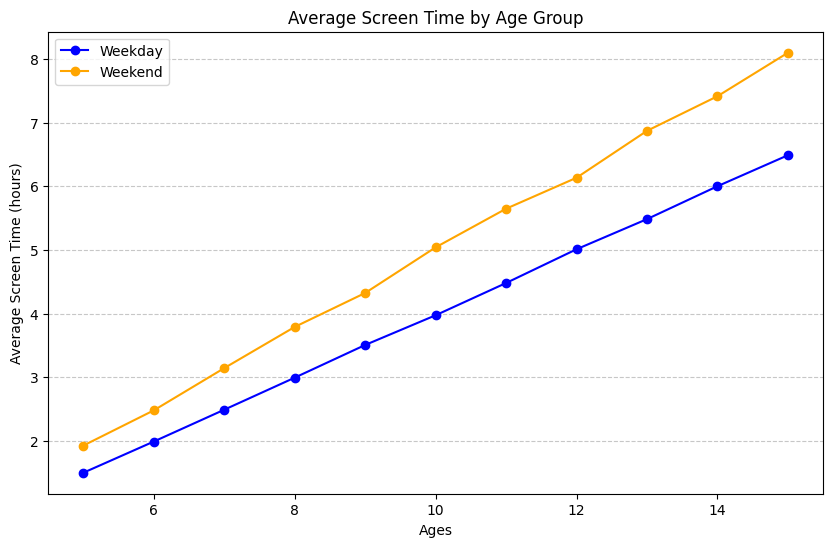

In [35]:
plt.figure(figsize=(10, 6))

plt.title('Average Screen Time by Age Group')
plt.xlabel('Ages')
plt.ylabel('Average Screen Time (hours)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.plot(average_weekday.index, average_weekday.values, label='Weekday', color='blue', marker='o')
plt.plot(average_weekend.index, average_weekend.values, label='Weekend', color='orange', marker='o')

plt.legend()
plt.show()

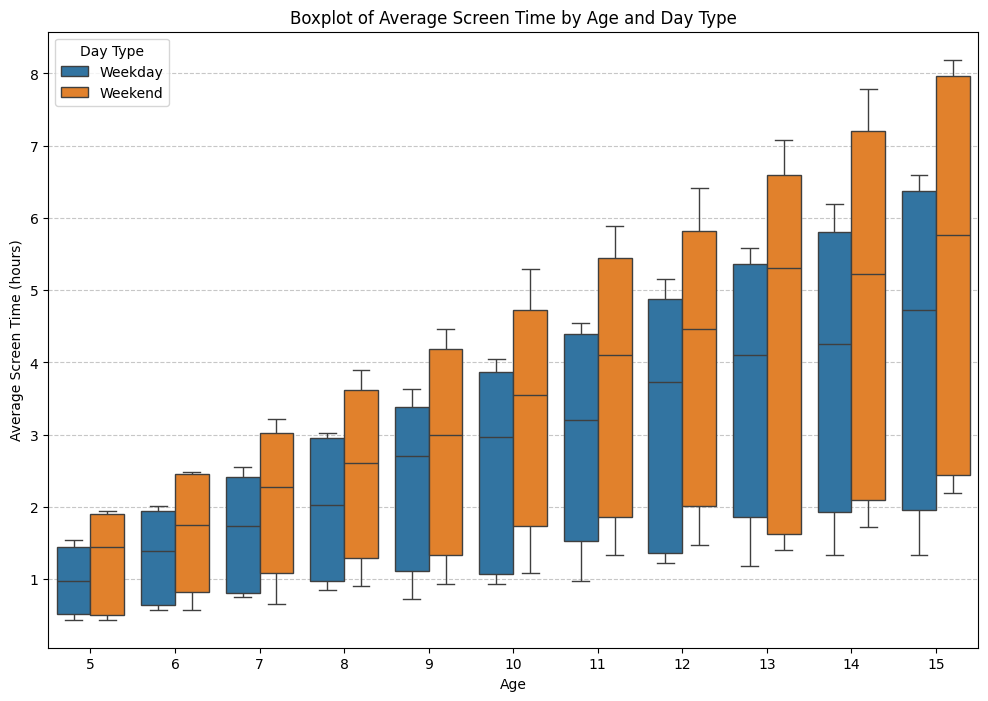

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age', y='Average Screen Time (hours)', data=data, hue='Day Type')

plt.title('Boxplot of Average Screen Time by Age and Day Type')
plt.xlabel('Age')
plt.ylabel('Average Screen Time (hours)')
plt.legend(title='Day Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We should also try to see if the gender of the child has some sort of influence towards the screentime.

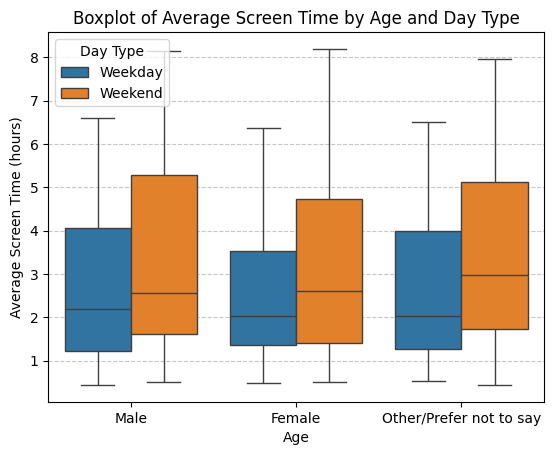

In [42]:
sns.boxplot(x='Gender', y='Average Screen Time (hours)', data=data, hue='Day Type')

plt.title('Boxplot of Average Screen Time by Age and Day Type')
plt.xlabel('Age')
plt.ylabel('Average Screen Time (hours)')
plt.legend(title='Day Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

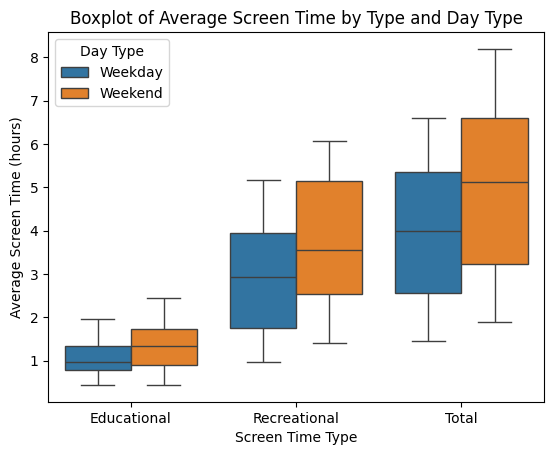

In [41]:

sns.boxplot(x='Screen Time Type', y='Average Screen Time (hours)', data=data, hue='Day Type')
plt.title('Boxplot of Average Screen Time by Type and Day Type')
plt.xlabel('Screen Time Type')
plt.ylabel('Average Screen Time (hours)')
plt.show()

The data also tells us if the screentime was done during a weekend or a weekday. We can infer that there will be more recreational screentime during the weekends, and just more screentime in general on the weekends due to the lack of school.

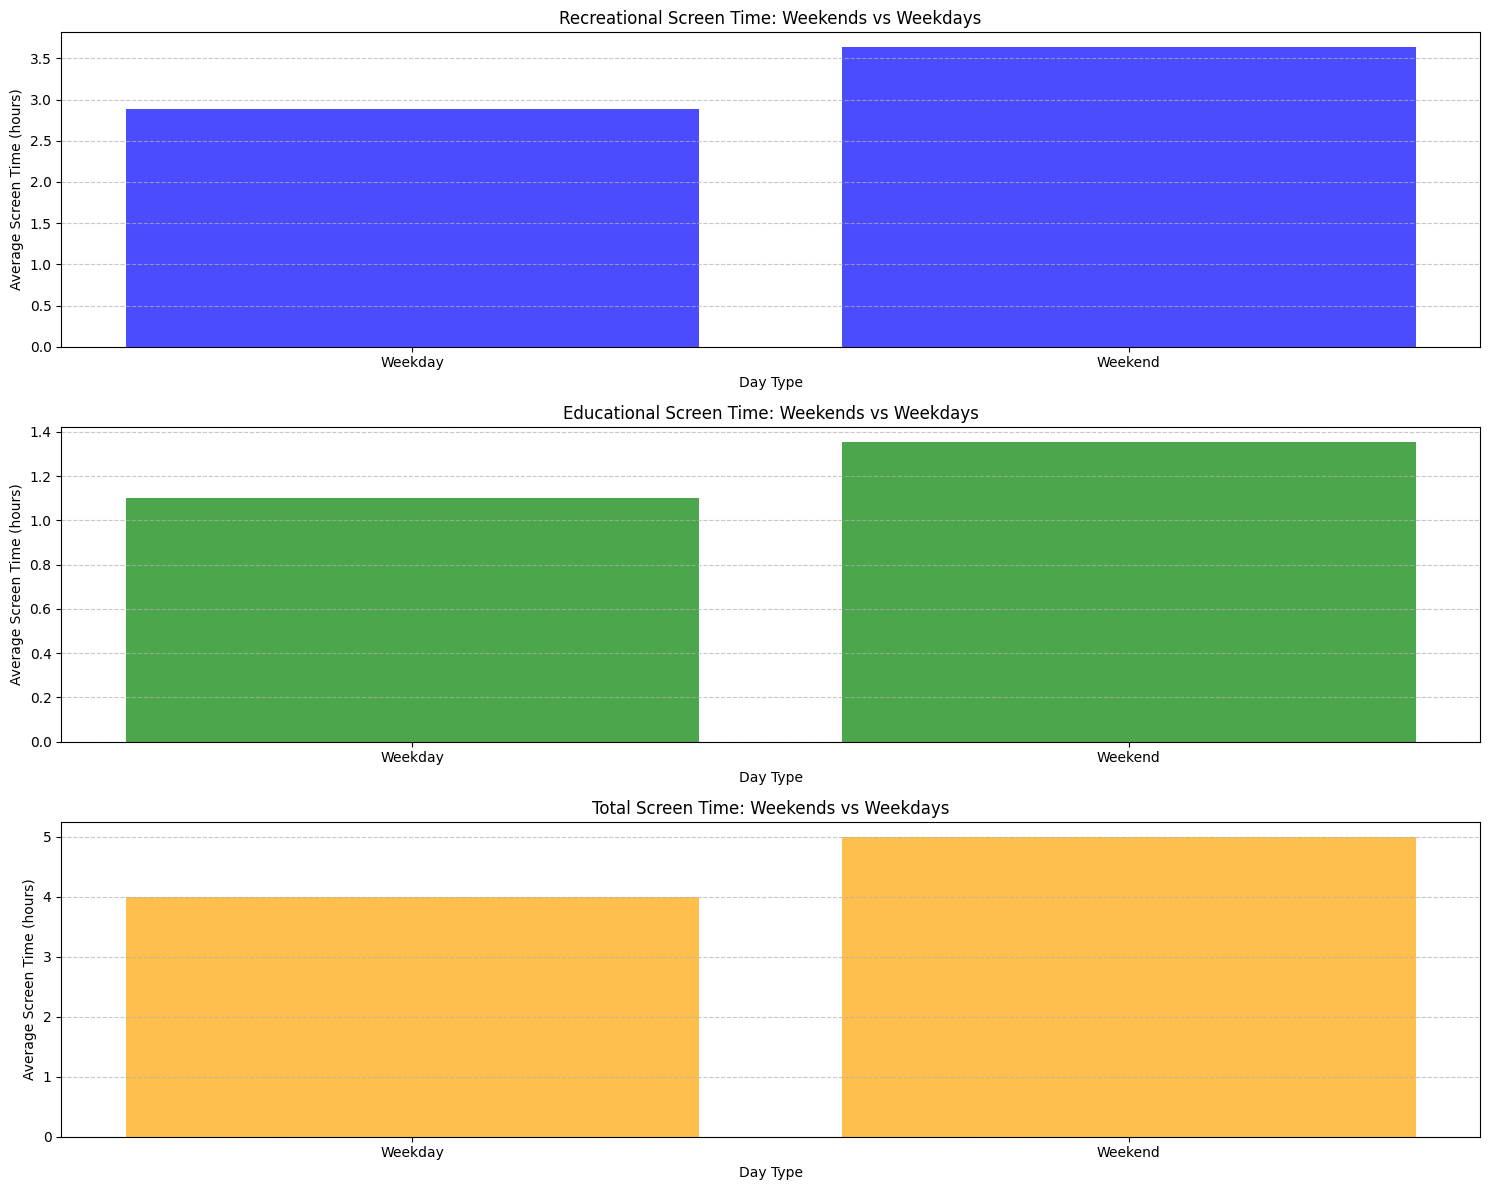

In [38]:
# Filter data for Recreational, Educational, and Total screen time
recreational = data[data['Screen Time Type'] == 'Recreational'].groupby('Day Type')['Average Screen Time (hours)'].mean()
educational = data[data['Screen Time Type'] == 'Educational'].groupby('Day Type')['Average Screen Time (hours)'].mean()
total = data[data['Screen Time Type'] == 'Total'].groupby('Day Type')['Average Screen Time (hours)'].mean()

# Create subplots
plt.figure(figsize=(15, 12))

# Recreational screen time
plt.subplot(3, 1, 1)
plt.bar(recreational.index, recreational.values, color='blue', alpha=0.7)
plt.title('Recreational Screen Time: Weekends vs Weekdays')
plt.xlabel('Day Type')
plt.ylabel('Average Screen Time (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Educational screen time
plt.subplot(3, 1, 2)
plt.bar(educational.index, educational.values, color='green', alpha=0.7)
plt.title('Educational Screen Time: Weekends vs Weekdays')
plt.xlabel('Day Type')
plt.ylabel('Average Screen Time (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Total screen time
plt.subplot(3, 1, 3)
plt.bar(total.index, total.values, color='orange', alpha=0.7)
plt.title('Total Screen Time: Weekends vs Weekdays')
plt.xlabel('Day Type')
plt.ylabel('Average Screen Time (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

There doesn't seem to be much difference. seems like the weekends just have more screentime, and thus have more of both educational and recreational. As a final check, we can create a correlation matrix between all of the columns. This'll help us in building a predictive model later. It might not be very insightful due to this dataset having only a few columns.

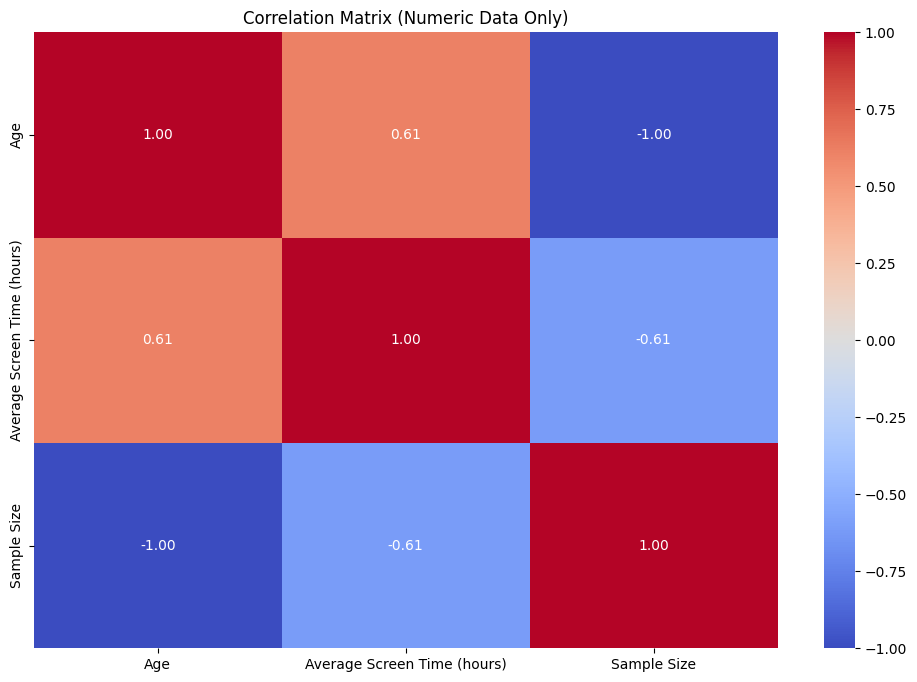

In [56]:
# We can drop the non-numerical columns
numeric_data = data.drop(columns=['Gender', 'Screen Time Type', 'Day Type'])

numeric_correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix (Numeric Data Only)")
plt.show()